In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
# from sklearn.cluster import clusterplot

# Load the Data

In [5]:
# Load data
df = pd.read_csv('../data/HR_data.csv')

## Define the subsets of the data

In [8]:
HR_columns = ['HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std',
       'HR_TD_Min', 'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew',
       'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope']
df_HR = df[HR_columns]

Temp_columns = ['TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min',
       'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew',
       'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean',
       'TEMP_TD_Slope']
df_Temp = df[Temp_columns]

EDA_columns = ['EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std',
       'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis',
       'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max',
       'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean',
       'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max',
       'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew',
       'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean',
       'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_ReT']
df_EDA = df[EDA_columns]

PhaseLabels = df["Phase"]

# Hierarchical Clustering

### Heart rate variables

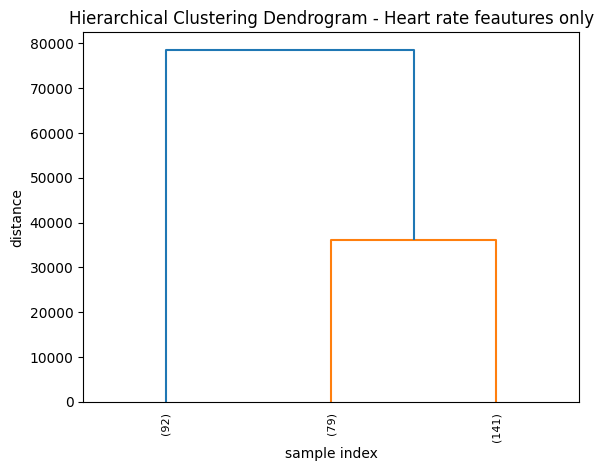

The labels associated with cluster 1 is:
Phase
phase2    39
phase3    28
phase1    25
Name: count, dtype: int64


The labels associated with cluster 2 is:
Phase
phase1    37
phase3    35
phase2     7
Name: count, dtype: int64


The labels associated with cluster 3 is:
Phase
phase2    58
phase1    42
phase3    41
Name: count, dtype: int64




In [ ]:
d_sample = 'euclidean' 
d_group = 'ward' 
N_leafs = 3 

Z = linkage(df_HR, method=d_group, metric=d_sample) #method denotes cluster distance, metric denotes sample distance
# plt.figure()
# plt.title('Hierarchical Clustering Dendrogram - Heart rate feautures only')
# plt.xlabel('sample index')
# plt.ylabel('distance')

# den = dendrogram(
#     Z,
#     leaf_rotation=90.,
#     leaf_font_size=8.,
#     truncate_mode='lastp',
#     p = N_leafs,
# )
# plt.show()

k=3

cluster_designation = fcluster(Z, k, criterion='maxclust') #Get cluster designation of data points

for i in range(1,k+1):
    datapoints = np.where(cluster_designation==i,)[0]
    print('The labels associated with cluster {} is:'.format(i))
    list = PhaseLabels[datapoints]
    counts = pd.Series(list).value_counts()
    print(counts)
    print('\n')

### Temp variables

In [27]:
d_sample = 'euclidean' 
d_group = 'ward' 
N_leafs = 3 

Z = linkage(df_Temp, method=d_group, metric=d_sample) #method denotes cluster distance, metric denotes sample distance
# plt.figure()
# plt.title('Hierarchical Clustering Dendrogram - Temp feautures only')
# plt.xlabel('sample index')
# plt.ylabel('distance')

# den = dendrogram(
#     Z,
#     leaf_rotation=90.,
#     leaf_font_size=8.,
#     truncate_mode='lastp',
#     p = N_leafs,
# )
# plt.show()

k=3

cluster_designation = fcluster(Z, k, criterion='maxclust') #Get cluster designation of data points

for i in range(1,k+1):
    datapoints = np.where(cluster_designation==i,)[0]
    print('The labels associated with cluster {} is:'.format(i))
    list = PhaseLabels[datapoints]
    counts = pd.Series(list).value_counts()
    print(counts)
    print('\n')

The labels associated with cluster 1 is:
Phase
phase1    6
phase2    6
Name: count, dtype: int64


The labels associated with cluster 2 is:
Phase
phase2    43
phase3    34
phase1    28
Name: count, dtype: int64


The labels associated with cluster 3 is:
Phase
phase3    70
phase1    70
phase2    55
Name: count, dtype: int64




### EDA variables

In [31]:
d_sample = 'euclidean' 
d_group = 'ward' 
N_leafs = 3 

print(np.any(np.isnan(df_EDA)))
print(np.any(np.isinf(df_EDA)))

df_EDA_clean = df_EDA.replace([np.inf, -np.inf], np.nan).dropna()

Z = linkage(df_EDA_clean, method=d_group, metric=d_sample) #method denotes cluster distance, metric denotes sample distance
# plt.figure()
# plt.title('Hierarchical Clustering Dendrogram - Temp feautures only')
# plt.xlabel('sample index')
# plt.ylabel('distance')

# den = dendrogram(
#     Z,
#     leaf_rotation=90.,
#     leaf_font_size=8.,
#     truncate_mode='lastp',
#     p = N_leafs,
# )
# plt.show()

k=3

cluster_designation = fcluster(Z, k, criterion='maxclust') #Get cluster designation of data points

for i in range(1,k+1):
    datapoints = np.where(cluster_designation==i,)[0]
    print('The labels associated with cluster {} is:'.format(i))
    list = PhaseLabels[datapoints]
    counts = pd.Series(list).value_counts()
    print(counts)
    print('\n')

True
False
The labels associated with cluster 1 is:
Phase
phase3    7
phase2    5
phase1    5
Name: count, dtype: int64


The labels associated with cluster 2 is:
Phase
phase3    22
phase1    21
phase2    19
Name: count, dtype: int64


The labels associated with cluster 3 is:
Phase
phase2    80
phase1    77
phase3    75
Name: count, dtype: int64


